## **Python and Big Data Analytics Course Project**

## *Agricultural Production Analysis*

<img src="https://cdn.pixabay.com/photo/2014/12/11/02/55/cereals-563796__340.jpg" width=1200  height=450/>

Kristine Dege

Grazina

##### **The Dataset used in the Course Project is downloaded from the website https://data.world/agriculture/**
##### Crop statistics for 173 products in Africa, the Americas, Asia, Europe, and Oceania (in the Course Project Eastern Europe Data will be used only).
##### Crops Primary, Fibre Crops Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute & Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity, yield and seed quantity. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world.
##### Data source: The Food and Agriculture Organization of the United Nations (FAO).

##### The objective of the Project is to ..........!!!!!!

*The full path used to get the dataset:*
* browser = webdriver.Edge('C:/Users/Kristine/Drivers/msedgedriver.exe')
* time.sleep(2)
* url = 'https://data.world/agriculture/'
* browser.get(url)
* dataset_button = browser.find_element(By.XPATH, '//*[@id="profile_view.main_tabs-pane-overview"]/div/div/div[1]/div/ul/li[2]/div').click() *# Click on Datasets button.*
* crop_pr_but = browser.find_element(By.XPATH, '//*[@id="profile_view.main_tabs-pane-resources"]/div/div/div[2]/div[2]/div/div/div[9]/div/div[2]/div[1]/a').click() *# Click Crop_Production datasets button.  Overview and discription of datasets are available.*
* crop_ds = browser.find_element(By.XPATH, '//*[@id="dataset_view.main_tabs-pane-details"]/div/div/div[1]/div[4]/div[8]/div/div/div[1]/div/div[1]/a[2]/span').click() *# In case you are not a registered user then sign-up model will be opened. There is an option to proceed with Google/ Facebook/ GitHub/ Twitter account.*

* browser.find_element(By.XPATH, '//*[@id="create_user.email"]').send_keys(email)  
* browser.find_element(By.XPATH, '//*[@id="create_user.displayName"]').send_keys(Name)
* browser.find_element(By.XPATH, '//*[@id="create_user.agentid"]').send_keys(Username)
* browser.find_element(By.XPATH, '//*[@id="create_user.password1"]').send_keys(Password)
* browser.find_element(By.XPATH, '/html/body/div[13]/div[2]/div/div/div/div/div[2]/div/div/div/form/button').click() *# Click on Continue button.*
* browser.find_element(By.XPATH, '/html/body/div[2]/div[2]/div/div/div/div/div[2]/a').click() *# Click on button Create a Project.*
* browser.find_element(By.XPATH, '//*[@id="root"]/div/div[2]/div[2]/div/div[1]/div[2]/div/div/div[4]/div/div/div/div/div[2]/div[1]/a').click() *# Now you should verify your e-mail address and then click on Crop Production dataset.*
* browser.find_element(By.XPATH, '//*[@id="dataset_view.main_tabs-pane-details"]/div/div/div[1]/div[4]/div[8]/div/div/div[1]/div/div[1]/a[2]').click() *# Click on dataset Crop Production in Eastern Europe.*
* browser.find_element(By.XPATH, '//*[@id="file_renderer.modal_common.export_dropdown"]/div/span[2]').click() *# Click on Download drop-down menu.*
* browser.find_element(By.XPATH, '/html/body/div[2]/div/ul/span[1]/li/a/div[2]/div[1]').click() *# Click on Share URL. Now you can copy the path to download csv file from web-site.*

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter
import seaborn as sns
#import geopandas as gpd
from folium.plugins import MarkerCluster
from folium import plugins
import folium
from geopy.geocoders import Nominatim
import pycountry_convert as pc
import numpy as np

In [53]:
import matplotlib.gridspec as gridspec

In [6]:
#df = pd.read_csv('https://query.data.world/s/zmbllbphuegmiqcjpgtnrl3xew2jxh')
#could not read, downloaded to pc and read that way
df = pd.read_csv(r'C:\Users\grazk\Documents\Git_project\Production_Crops_E_Europe.csv')

In [7]:
df.sample(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F
469,11,Austria,1729,"Treenuts, Total",5312,Area harvested,ha,NaN,A,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,170.0,A,170.0,A
6430,162,Norway,116,Potatoes,5510,Production,tonnes,1222200.0,NaN,919200.0,...,305200.0,NaN,350800.0,NaN,315500.0,NaN,326400.0,NaN,332200.0,NaN
3671,84,Greece,530,"Cherries, sour",5510,Production,tonnes,4064.0,NaN,5166.0,...,2031.0,NaN,1750.0,NaN,1531.0,NaN,910.0,NaN,590.0,NaN
3309,68,France,222,"Walnuts, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,20226.0,Fc,19471.0,Fc,15070.0,Fc,17000.0,Fc,13505.0,Fc
7308,183,Romania,552,Blueberries,5419,Yield,hg/ha,NaN,NaN,NaN,...,21333.0,Fc,23281.0,Fc,25682.0,Fc,36111.0,Fc,29048.0,Fc


In [8]:
df.shape

(10557, 125)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10557 entries, 0 to 10556
Columns: 125 entries, Area Code to Y2019F
dtypes: float64(59), int64(3), object(63)
memory usage: 10.1+ MB


In [10]:
# Deleting all forecast columns as they are empty

for col in df.columns:
    if 'F' in col:
        del df[col]
   
df.head(3)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,3,Albania,515,Apples,5312,Area harvested,ha,NaN,NaN,NaN,...,3913.0,3450.0,3719.0,3838.0,3863.0,4008.0,4230.0,4346.0,4294.0,4407.0
1,3,Albania,515,Apples,5419,Yield,hg/ha,NaN,NaN,NaN,...,139545.0,185507.0,191718.0,197316.0,212426.0,228882.0,240028.0,221671.0,252387.0,240374.0
2,3,Albania,515,Apples,5510,Production,tonnes,10004.0,8039.0,7931.0,...,54604.0,64000.0,71300.0,75730.0,82060.0,91736.0,101532.0,96338.0,108375.0,105933.0


In [11]:
#Changing years column name from'Y2010' to numeric only

df.columns = map(lambda x : x.replace("Y", ""), df.columns)

In [12]:
#Dropping 4 columns as they won't be used in analysis

df.drop(['Area Code', 'Item Code', 'Element', 'Element Code'], axis=1, inplace=True)

In [13]:
#Reshaping dataset for analysis and plotting

df_melted = (df.melt(id_vars=['Area', 'Item', 'Unit'],var_name='Year')
                    .set_index(['Area', 'Item', 'Year', 'Unit'])
                    .squeeze()
                    .unstack()
                    .reset_index())

In [14]:
df_melted.columns

Index(['Area', 'Item', 'Year', 'ha', 'hg/ha', 'tonnes'], dtype='object', name='Unit')

In [15]:
# Renaming columns

df_melted.columns = ['Country', 'Item', 'Year', 'Area_ha', 'Yield_hg_ha', 'Production_t']

In [16]:
df_melted.reset_index().head(3)

,index,Country,Item,Year,Area_ha,Yield_hg_ha,Production_t
0,0,Albania,Apples,1961,NaN,NaN,10004.0
1,1,Albania,Apples,1962,NaN,NaN,8039.0
2,2,Albania,Apples,1963,NaN,NaN,7931.0


In [17]:
df_melted.shape

(222312, 6)

In [18]:
# Dropping rows where NaN values are in all three columns

df_melted.dropna(subset = ['Area_ha', 'Yield_hg_ha', 'Production_t'], how='all', inplace=True)

In [19]:
# As some product items (for example apples, mushrooms) do not have values in columns Area_ha and Yield hg/ha
# but only production in tonnes then it's reasonable to change these NaN values to 0

df_melted.replace(np.nan, "0", inplace = True)

In [20]:
df_melted.info()    #All columns have same dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118660 entries, 0 to 222283
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Country       118660 non-null  object
 1   Item          118660 non-null  object
 2   Year          118660 non-null  object
 3   Area_ha       118660 non-null  object
 4   Yield_hg_ha   118660 non-null  object
 5   Production_t  118660 non-null  object
dtypes: object(6)
memory usage: 6.3+ MB


In [21]:
convert_dict = {
                'Area_ha': int,
                'Yield_hg_ha': int,
                'Production_t': int
                }
 
df_melted = df_melted.astype(convert_dict) #Converting dtype to appropriate

In [22]:
df_melted['Year'] = pd.to_datetime(df_melted['Year'])

In [23]:
# Adding new column to see yield production t/ha

df_melted['Yield_t_ha'] = round(df_melted.apply(lambda row: (row.Yield_hg_ha / 10_000), axis = 1), 2)

In [24]:
df_melted.describe().apply(lambda s: s.apply('{:,.2f}'.format)) # Formatting describe function to more readable

,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
count,"118,660.00","118,660.00","118,660.00","118,660.00"
mean,"240,676.11","165,737.91","1,012,989.45",16.57
std,"2,423,433.90","1,972,491.98","5,417,701.25",197.25
min,0.00,0.00,0.00,0.00
25%,439.00,"12,854.00","3,153.75",1.29
50%,"4,400.00","37,976.50","26,377.50",3.80
75%,"35,132.25","132,545.00","234,678.50",13.25
max,"125,150,000.00","244,995,000.00","213,687,000.00","24,499.50"


In [25]:
df_melted.shape     # By dropping NaN values total number of rows reduced from 222_312 to 118_660

(118660, 7)

In [26]:
df_melted.sample(5)

,Country,Item,Year,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
41223,Czechia,Grapes,2002-01-01,12945,43787,56682,4.38
25897,Bosnia and Herzegovina,Sugar beet,2016-01-01,17,198824,338,19.88
132253,North Macedonia,"Cow peas, dry",1995-01-01,1877,31966,6000,3.20
71172,Germany,"Beans, dry",1979-01-01,2540,31161,7915,3.12
150273,Portugal,"Vegetables, leguminous nes",1961-01-01,4000,100000,40000,10.00


In [27]:
df_melted['Item'].nunique()     #Dataset still contains all 137 product items

137

In [28]:
df_melted['Item'].unique()

array(['Apples', 'Apricots', 'Barley', 'Beans, dry', 'Beans, green',
       'Broad beans, horse beans, dry', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Cauliflowers and broccoli',
       'Cereals, Total', 'Cherries', 'Cherries, sour', 'Chestnut',
       'Chillies and peppers, green', 'Citrus Fruit, Total',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Fibre Crops Primary', 'Figs', 'Fruit Primary',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Garlic', 'Grapes',
       'Hops', 'Leeks, other alliaceous vegetables', 'Lemons and limes',
       'Lettuce and chicory', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Mushrooms and truffles', 'Nuts nes', 'Oats', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent', 'Okra',
       'Olives', 'Onions, dry', 'Onions, shallots, green', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Peas, green',
       'Plums and sloes', 'Potatoes', 'Pulses nes', 'Pulses, Total',
 

In [29]:
df_melted['Item'].value_counts()

Roots and Tubers, Total         1934
Potatoes                        1934
Vegetables Primary              1875
Tomatoes                        1875
Cabbages and other brassicas    1846
                                ... 
Tung nuts                         31
Okra                              30
Coffee, green                     28
Coconuts                          27
Agave fibres nes                   1
Name: Item, Length: 137, dtype: int64

##### The most cultivated agriculture products are: roots, potatoes, tomatoes, primary vegetables and cabbages.
##### The less cultivated products in Europe are: tung nuts, green coffee, coconuts, agave fibres.

In [30]:
# Creating new dataframe for map plotting

df_map = pd.DataFrame(df_melted.groupby(['Year', 'Country'], sort=True)['Production_t', 'Area_ha'].sum()).reset_index()

C:\Users\grazk\AppData\Local\Temp\ipykernel_11188\3853495159.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_map = pd.DataFrame(df_melted.groupby(['Year', 'Country'], sort=True)['Production_t', 'Area_ha'].sum()).reset_index()


In [31]:
df_map.shape

(1934, 4)

In [32]:
df_melted['Country'].nunique()

45

In [59]:
df_map['Country'].nunique()

45

In [33]:
# Converting country name (column 'Country') into continent name

def convert(row):
    try:
        cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format='default')
        conti_code = pc.country_alpha2_to_continent_code(cn_code)
        return conti_code
    except:
        None
  

In [61]:
# Creating nem column 'Continent'

df_map['Continent'] = df_map.apply(convert, axis = 1)
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent
1564,2010-01-01,Romania,60919454,17485126,EU
1522,2009-01-01,Portugal,13509032,2706721,EU
1605,2011-01-01,Russian Federation,423911627,133299510,EU


In [62]:
df_none = df_map[df_map['Continent'].isnull()] ## checking None values

In [63]:
df_none['Country'].unique() 

array(['Belgium-Luxembourg', 'Czechoslovakia', 'USSR', 'Yugoslav SFR',
       'Serbia and Montenegro'], dtype=object)

In [35]:
#There are five countries that have changed their names and external borders. It is reasonable to drop them.

val = ['Belgium-Luxembourg', 'Czechoslovakia', 'USSR', 'Yugoslav SFR', 'Serbia and Montenegro']

In [36]:
df_map = df_map[df_map.Country.isin(val) == False]

In [37]:
df_map.shape    # 147 rows are dropped

(1787, 4)

In [38]:
df_melted = df_melted[df_melted.Country.isin(val) == False]

In [39]:
# Converting conutry name into short name

def country(row):
    try:
        countr_code =  pc.country_name_to_country_alpha2(row.Country, cn_name_format='default')
        return countr_code
    except:
        return None

In [69]:
#Creating new column with countries' abrreviation

df_map['Country_Abrr'] = df_map.apply(country, axis = 1)
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr
1479,2008-01-01,North Macedonia,3954911,664866,EU,MK
1286,2003-01-01,Romania,55820805,17765655,EU,RO
1604,2011-01-01,Romania,72356603,18190840,EU,RO


In [70]:
#Creating latitude and logitude values

geolocator = Nominatim(user_agent='berzina_e@yahoo.com')
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country.Country)
        # And return latitude and longitude
        return loc.latitude, loc.longitude
    except:
        # Return missing value as some countries as USSR do not exist any more
        return None

In [71]:
#Creating new column Geolocatin with latitude and longitude values

df_map['GeoLocation'] = df_map.apply(geolocate, axis = 1)

In [72]:
df_map[df_map['GeoLocation'].isnull()]

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr,GeoLocation


In [73]:
#Creating two new columns

df_map[['Latitude', 'Longitude']] = df_map['GeoLocation'].astype(str)\
                .str.strip('()')\
                .str.split(', ', expand=True)\
                .rename(columns={0:'Latitude', 1:'Longitude'}) 

In [74]:
df_map.sample(3)

,Year,Country,Production_t,Area_ha,Continent,Country_Abrr,GeoLocation,Latitude,Longitude
1500,2009-01-01,Croatia,14041598,1888499,EU,HR,"(45.5643442, 17.0118954)",45.5643442,17.0118954
459,1978-01-01,Albania,3665551,1256500,EU,AL,"(41.000028, 19.9999619)",41.000028,19.9999619
737,1988-01-01,France,240900424,31988168,EU,FR,"(46.603354, 1.8883335)",46.603354,1.8883335


In [75]:
my_map = folium.Map(
    location=[42.9868853, 19.5180992],
    zoom_start=4
    )

for _, country in df_map.iterrows():
    folium.CircleMarker(
        location=[country['Latitude'], country['Longitude']],
        radius=5,
        fill_color='red'
    ).add_to(my_map)

my_map

In [76]:
conv_dict = {
                'Latitude': float,
                'Longitude': float
                }
 
df_map = df_map.astype(conv_dict)

In [77]:
df_map['Year'] = df_map['Year'].dt.strftime('%Y')

In [78]:
map_agr_area = folium.Map([42 ,29], zoom_start=5)

marker_cluster = MarkerCluster(
    name="clustered name",
).add_to(map_agr_area)

for row in df_map.itertuples():
    #print(row)
    folium.Marker(location=[row.Latitude,row.Longitude],popup=[row.Area_ha, row.Year]).add_to(marker_cluster)

folium.LayerControl().add_to(map_agr_area)

map_agr_area

In [79]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 1933
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1787 non-null   object 
 1   Country       1787 non-null   object 
 2   Production_t  1787 non-null   int32  
 3   Area_ha       1787 non-null   int32  
 4   Continent     1787 non-null   object 
 5   Country_Abrr  1787 non-null   object 
 6   GeoLocation   1787 non-null   object 
 7   Latitude      1787 non-null   float64
 8   Longitude     1787 non-null   float64
dtypes: float64(2), int32(2), object(5)
memory usage: 125.6+ KB


In [44]:
#df_map.loc[df_map.Country == 'North Macedonia', ['GeoLocation', 'Latitude', 'Longitude']] = '(41.6137,  21.7433)', 41.6137,  21.7433 

In [51]:
n = 20

In [ ]:
df_melted.nlargest(n, 'Production_t', keep = 'all')

In [ ]:
df_melted.nsmallest(n, 'Area_ha', keep = 'all')

In [ ]:
df_melted.sort_values('Yield_t_ha', ascending=False).head(n)

In [130]:
# Choosing rows with Latvian area

df_lv = df.loc[df['Area'] =='Latvia'] 

In [131]:
#Deleting empty years (Y1961-Y1991) as Latvia was a part of USSR

df_lv.drop(df.iloc[:, 7:38], inplace=True, axis=1)
df_lv.head(4)

C:\Users\Д\AppData\Local\Temp\ipykernel_636\317519920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lv.drop(df.iloc[:, 7:38], inplace=True, axis=1)


,Area Code,Area,Item Code,Item,Element Code,Element,Unit,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4819,119,Latvia,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4820,119,Latvia,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4821,119,Latvia,515,Apples,5312,Area harvested,ha,12000.0,12000.0,12000.0,...,3257.0,3379.0,3136.0,2762.0,2653.0,2417.0,2458.0,3331.0,3200.0,3440.0
4822,119,Latvia,515,Apples,5419,Yield,hg/ha,42500.0,77500.0,15833.0,...,31701.0,22199.0,30131.0,53407.0,36272.0,32333.0,40090.0,22408.0,43438.0,30203.0


In [9]:
# The dataset of selling prices of crop products is downloaded from:
#  https://ec.europa.eu/eurostat/databrowser/view/apri_ap_crpouta

,Area Code
0,3
1,3
2,3
3,3
4,3


In [40]:
#checking which are most produced in tons
most_produced=df_melted.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False)
most_produced.head(10)
#Surprisingly,  sugar beet is no 1

,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
Item,,,,
"Cereals, Total",5358896452,67902707,18530037826,6790.24
Sugar Crops Primary,202238673,640078744,8483854539,64007.99
Sugar beet,201908668,639731291,8461256394,63973.28
Wheat,2350593397,68503215,8288422540,6850.21
"Roots and Tubers, Total",380659074,381499563,6981021890,38149.95
Potatoes,379950580,382042314,6973033314,38204.31
Fruit Primary,469114651,3652384440,4337886890,365238.52
Barley,1289035236,59009188,4163388325,5901.11
Vegetables Primary,207493015,396051964,3984466223,39605.33


In [41]:
#could be skewed due to the fact that unequal number of years might be available for some items. Checking just 2019
most_produced_2019 = df_melted.loc[df_melted['Year'] == '2019-01-01']
most_produced_2019.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False).head(20)


,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha
Item,,,,
"Cereals, Total",121096357,2080874,543061049,208.11
Wheat,62385441,1949675,266122709,194.98
Sugar beet,3166508,17551487,194460403,1755.17
Sugar Crops Primary,3166508,17551487,194460403,1755.17
Maize,18353189,2374605,132773194,237.46
"Roots and Tubers, Total",4696611,10232783,107271603,1023.30
Potatoes,4696336,10232490,107264935,1023.27
Barley,24222012,1772530,95634161,177.30
Oilcrops,40433293,981627,89217783,98.15


#### Top 5 were:
* Wheat
* Sugar beet
* Maize
* Potatoes
* Barley
#### Sugar beet not directly for food, barley I assume might be mostly for beer, so not food either.
#### This leaves 3 main food items: wheat, potatoes, maize

In [42]:
#very long name, looks ugly in the figure
most_produced_2019.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace= True)



C:\Users\grazk\AppData\Local\Temp\ipykernel_11188\2812016220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_produced_2019.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace= True)


In [44]:
#Staple food production by country
wheat_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Wheat'].sort_values(by = 'Production_t', ascending = False)
potato_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Potatoes'].sort_values(by = 'Production_t', ascending = False)
Maize_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Maize'].sort_values(by = 'Production_t', ascending = False)

#I wanted to make simple choise input (As in "which major agricultural product do you want to see, select ... etc")
#And then make if else loop that would make dataframe based on the choise and proceed to figure.
# But for whatever reason the cell runs forever and won't execute the code. Ended up simply making dataframes, no user choice provided


In [55]:
def barplot_by_country(df_name, title = ''):
    fig1 = sns.barplot(data=df_name, x= "Country", y= "Production_t")
    plt.xlabel("Country")
    plt.ylabel("Production, tons")
    plt.xticks(rotation = 90)
    plt.title(title)
    
    return fig1



<AxesSubplot: title={'center': 'Wheat production'}, xlabel='Country', ylabel='Production, tons'>

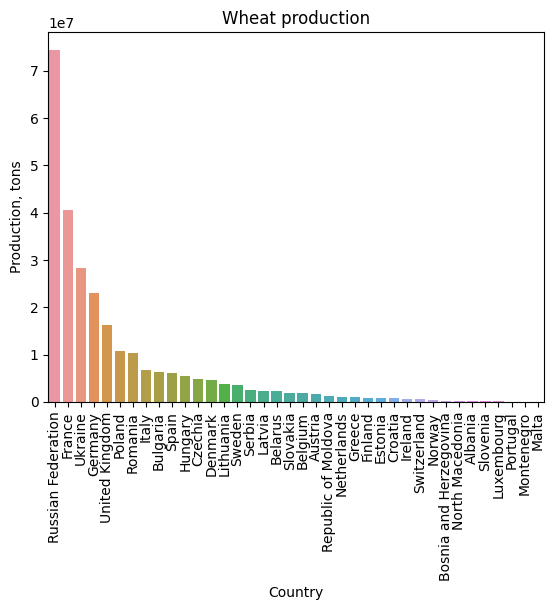

In [62]:
barplot_by_country(wheat_production_XXI, 'Wheat production')



<AxesSubplot: title={'center': 'Maize production'}, xlabel='Country', ylabel='Production, tons'>

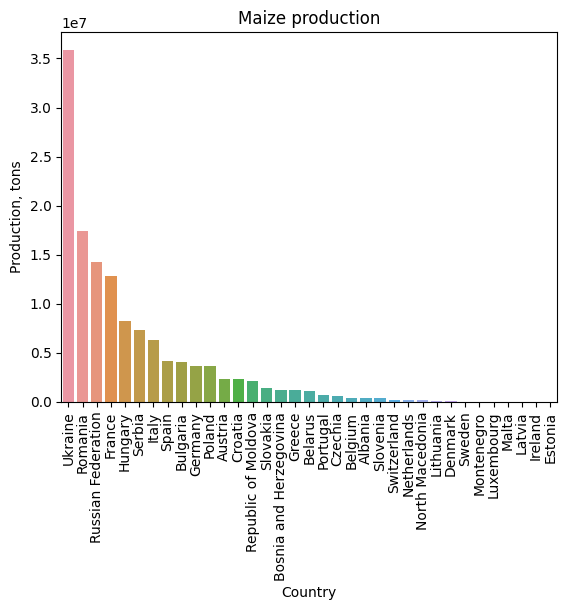

In [60]:
barplot_by_country(Maize_production_XXI, 'Maize production')

<AxesSubplot: title={'center': 'Potato production'}, xlabel='Country', ylabel='Production, tons'>

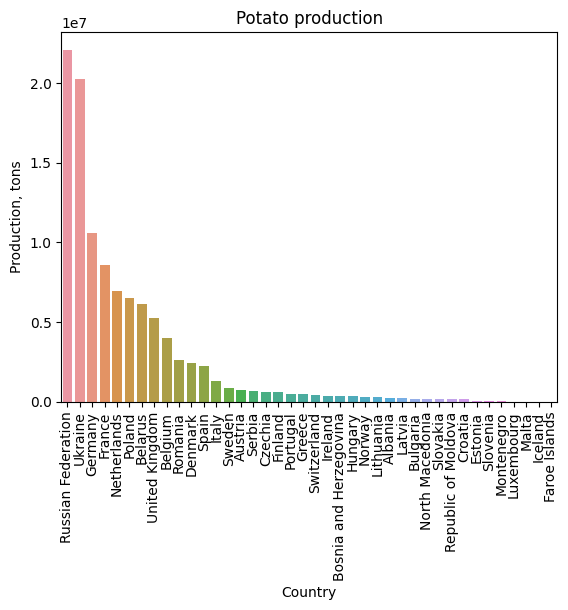

In [61]:
barplot_by_country(potato_production_XXI, 'Potato production')